In [1]:
import pandas as pd
import json

In [2]:
df = pd.read_csv('exlora_training_logs.csv')

In [3]:
# expand rows
df = df.drop('Id', axis=1)

def mutate_row(row):
    summary_json = json.loads(row["summary"].strip('\"').replace('\'', '\"'))
    config_json = json.loads(row["config"].strip('\"').replace('\'', '\"'))
    if "from_expert_id" not in config_json:
        config_json["from_expert_id"] = None
    row["from_expert_id"] = config_json["from_expert_id"]
    if "to_expert_id" not in config_json:
        config_json["to_expert_id"] = None
    row["to_expert_id"] = config_json["to_expert_id"]
    if "layer_id" not in config_json:
        config_json["layer_id"] = None
    row["layer_id"] = config_json["layer_id"]
    if "mean_diff" not in summary_json:
        summary_json["mean_diff"] = None
    row["mean_diff"] = summary_json["mean_diff"]
    if "eval_loss" not in summary_json:
        summary_json["eval_loss"] = None
    row["eval_loss"] = summary_json["eval_loss"]
    if "r" not in config_json:
        config_json["r"] = None
    row["r"] = config_json["r"]
    return row

def filter_row(row):
    return "from" in row["name"]

df = df.apply(mutate_row, axis=1)
df = df[df.apply(filter_row, axis=1)]

df = df.drop('summary', axis=1)
df = df.drop('config', axis=1)

In [4]:
df_128 = df[df["r"] == 128]

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

(0.0, 2.0)

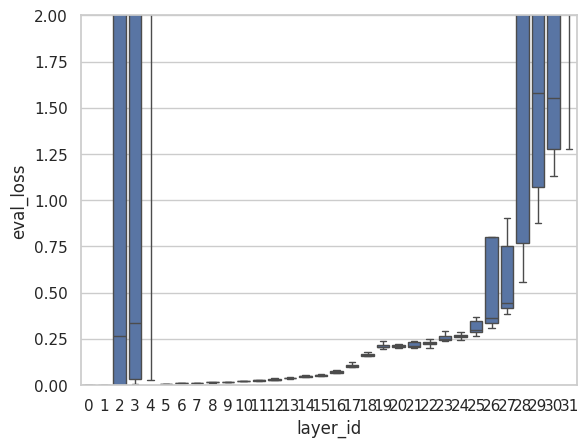

In [12]:
# plot distribution of avg diff for each layer
sns.set(style="whitegrid")
ax = sns.boxplot(x="layer_id", y="eval_loss", data=df_128, showfliers=False)
ax.set_ylim(0, 2)

In [13]:
# for each from_expert, find the to_expert with the min mean_diff
df_128_min = df_128.groupby(["from_expert_id", "layer_id"]).apply(lambda x: x.loc[x["mean_diff"].idxmin()])

In [14]:
df_128_min

name  from_expert_id  to_expert_id  \
from_expert_id layer_id                                                     
0              0          from0_to7_l0_r128               0             7   
               1          from0_to5_l1_r128               0             5   
               2          from0_to7_l2_r128               0             7   
               3          from0_to7_l3_r128               0             7   
               4          from0_to1_l4_r128               0             1   
...                                     ...             ...           ...   
7              27        from7_to2_l27_r128               7             2   
               28        from7_to1_l28_r128               7             1   
               29        from7_to3_l29_r128               7             3   
               30        from7_to4_l30_r128               7             4   
               31        from7_to4_l31_r128               7             4   

                         layer_id  mean_diff  eval_loss    r  
from_expert_id layer_id                                       
0              0                0   0.007986   0.000133  128  
               1                1   0.008721   0.000147  128  
               2                2   0.015374   0.000444  128  
               3                3   0.044988   0.004388  128  
               4                4   0.079703   0.035527  128  
...                           ...        ...        ...  ...  
7              27              27   0.476112   0.396785  128  
               28              28   0.568510   0.586238  128  
               29              29   0.693209   0.891677  128  
               30              30   0.791316   1.167368  128  
               31              31   0.755559   1.278846  128  

[256 rows x 7 columns]

(0.0, 1.0)

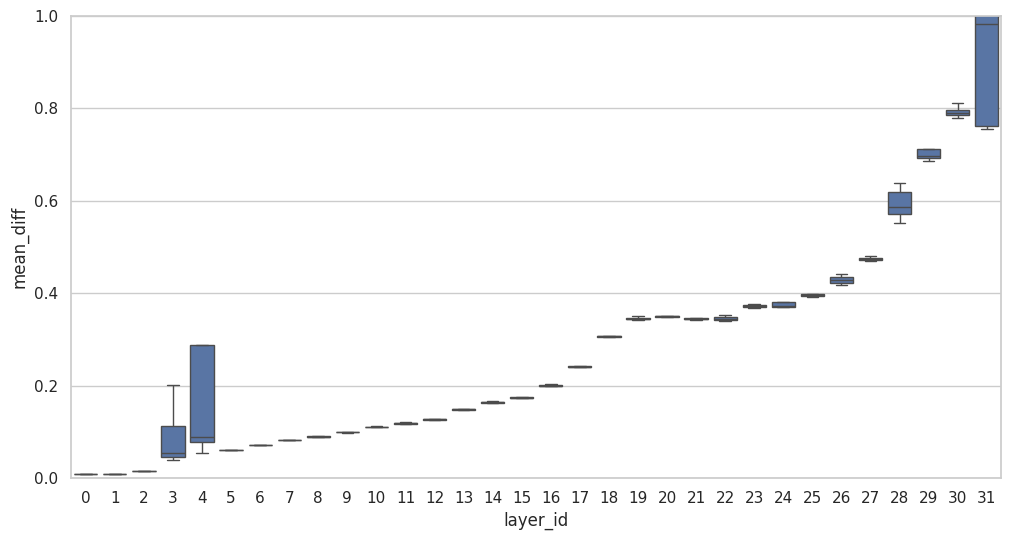

In [15]:
# plot distribution of avg diff for each layer
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.boxplot(x="layer_id", y="mean_diff", data=df_128_min, showfliers=False)
ax.set_ylim(0, 1)

In [19]:
df_128_from0 = df_128[df_128["from_expert_id"] == 0]

(0.0, 1.0)

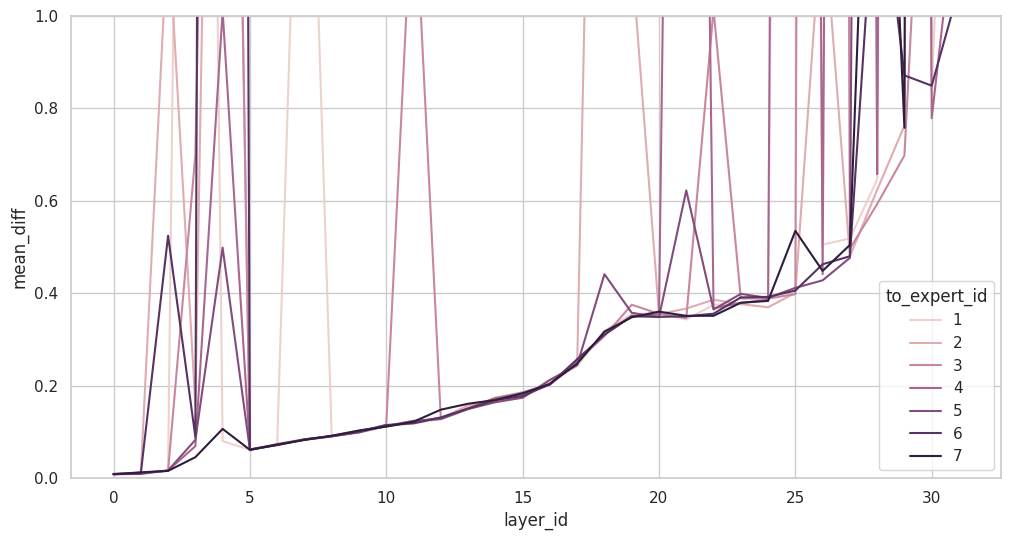

In [21]:
# plot avg diff for each layer
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
ax = sns.lineplot(x="layer_id", y="mean_diff", hue="to_expert_id", data=df_128_from0)

ax.set_ylim(0, 1)

In [22]:
# find the layer with the min mean_diff for each layer
df_128_from0_min = df_128_from0.groupby("layer_id").apply(lambda x: x.loc[x["mean_diff"].idxmin()])

In [24]:
df_128_from0_min

,name,from_expert_id,to_expert_id,layer_id,mean_diff,eval_loss,r
layer_id,,,,,,,
0,from0_to7_l0_r128,0,7,0,0.007986,0.000133,128
1,from0_to5_l1_r128,0,5,1,0.008721,0.000147,128
2,from0_to7_l2_r128,0,7,2,0.015374,0.000444,128
3,from0_to7_l3_r128,0,7,3,0.044988,0.004388,128
4,from0_to1_l4_r128,0,1,4,0.079703,0.035527,128
5,from0_to2_l5_r128,0,2,5,0.060472,0.006308,128
6,from0_to3_l6_r128,0,3,6,0.070782,0.008512,128
7,from0_to2_l7_r128,0,2,7,0.082275,0.011432,128
8,from0_to2_l8_r128,0,2,8,0.089787,0.013430,128
